## An Introduction to Logistic Regression

In this session, we will introduce the logistic regression model as
special case of a linear regression model (a generalized linear model)
where the **response variable is categorical**.

We will discuss responses in terms of **probabilities and odds**.

## Objectives

Upon successful completion of this session, you should be able to:

-   Understand the basics of the logistic regression model

-   Fit a logistic model to data to model a binary response variable as
    a function of a set of predictors.

-   Interpret coefficients of a logistic regression model: understand odds and odds ratios

-   Test and asses model accuracy with drop-in-deviance likelihood ratio
    tests

## Model definition

Logistic regression models a binary response variable as a function of
explanatory/predictor variable(s).

For instance, given the categorical response variable $Y$ for *Disease
State* taking on the values of *Disease* and *No disease*:

$\mathrm{Y} = \begin{cases} 1 & \text{Disease} \\ 0 & \text{No disease} \end{cases}$

we no longer model $Y = \mu(Y|X)$

Rather we model ***probability*** that $Y$ belongs to a particular
category/class: $Pr(Y = 1| X)$, for instance the probability of
developing the disease.

For logistic regression --- with one predictor variable --- we model
$Pr(Y = 1| X)$ using a function that gives outputs between 0 and 1.

The **logistic function** below describes a population proportion or
probability as a function of one predictor variable:

$Pr(Y = 1| X) = \frac {exp(\beta_0 + \beta_1X_1)} {1 + exp(\beta_0 + \beta_1X_1)}$

A logistic function is similar to a common S-shaped (sigmoid) curve.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import pandas as pd
import seaborn as sns

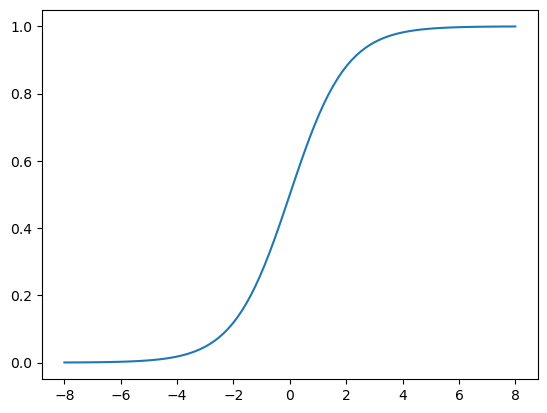

In [62]:
#define a logistic function
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

x=np.linspace(-8, 8, 100)

plt.plot(x, logistic(x))

### The logit function

Manipulating the logistic function encountered above yields:

$\frac {Pr(Y = 1| X)}{1-Pr(Y = 1| X)} = e^{\beta_0 + \beta_1X}$

The quantity $\frac {Pr(Y = 1| X)}{1-Pr(Y = 1| X)}$ is the **odds**
($\omega$)

Taking natural logs yields a **log odds (logit)** function:

$ln(\frac {Pr(Y = 1| X)}{1-Pr(Y = 1| X)}) = ln(\omega) = \beta_0 + \beta_1X$

We can now interpret the coefficient $\beta_1$ of the logit function as
follows:

**Increasing** $X$ **by one unit changes the log odds by** $\beta_1$**.
Equivalently, it multiplies the odds by $e^{\beta_1}$**

The same formalism extends to multiple *p* predictor variables
(continuous and categorical):

$ln(\omega) = \beta_0 + \beta_1X_1 + \beta_2X_2 + ...+\beta_pX_p$

Exponentiating the logit yields the odds:

$\omega = e^{\beta_0 + \beta_1X_1 + \beta_2X_2 + ...+\beta_pX_p}$

We can then compare the odds between different values of a particular
predictor $X$, for fixed values of other predictors. 

For instance, the
odds at $X_1=A$ relative to the odds at $X_1=B$ -- for fixed values of
other $Xs$ -- is:

$\phi = \frac {\omega_A}{\omega_B} = e^{[\beta_1(A-B)]}$

Unlike the case in simple and multiple linear regression, coefficients
in logistic regression are estimated by the maximum likelihood method.

### Odds and Odds Ratios (ORs)

Consider the following data set showing the number of individuals that
developed coronary artery disease (CAD).
| Gender    | Disease   | No Disease |
|--------|-----------|------------|
| Male   | 217 (57%) | 162 (43%)  |
| Female | 105 (44%) | 136 (56%)  |


Gender is a potential (binary) predictor of CAD, and the response variable
is also binary (Disease/No Disease).

To determine whether the two variables are independent, we can perform a
Chi-square test of independence.


In [61]:
cad = pd.DataFrame({
    "Male": [162, 217],
    "Female": [136, 105]
})
cad

,Male,Female
0,162,136
1,217,105


We perform a Chi-square test of independence

In [63]:
import scipy.stats as ss
(chi2, p, df, arr) = ss.chi2_contingency(cad, correction = True)
"chi2 = %4.2f, p-value = %4.4f" % (chi2, p)

'chi2 = 10.52, p-value = 0.0012'

There's evidence for a significant association between sex and the
likelihood of developing CAD (p-value = 0.0012).

Since we have only one qualitative predictor (no quantitative
predictor), the Chi-square test is sufficient, no need for logistic
regression. Otherwise a logistic regression with multiple predictors
would be used.

Notice how the above test is essentially comparing proportions of two
groups (Male and Female), a comparison that is analogous to comparing
two means such as in t-tests or SLR model.

We can quantify the significant gender effect with Odds ratios.

| Gender    | Probability of Disease | Odds ($\hat\omega$)     |
|--------|------------------------|-------------------------|
| Male   | 0.573                  | 0.573/(1-0.573) = 1.341 |
| Female | 0.436                  | 0.436/(1-0.436) = 0.773 |

$OR = \hat\phi = \frac {\hat\omega_M}{\hat\omega_F} = 1.341\div 0.773 = 1.74$

The odds of men developing CAD are estimated to be 1.74 times as large
as the odds of women.

Equivalently, the odds of men developing CAD are
($100 \times (\hat\phi - 1) = 100 \times (1.74 -1)$) 74% greater than
the odds of women developing CAD.

In the following case study, we incorporate multiple predictors to model
their effect on log odds of a binary response variable.

## Case Study 3: Sociodemographic predictors of energy insecurity
The escalation of energy insecurity poses an increasingly significant public health concern within the low-income communities of the United States. 

Previous studies have demonstrated a connection between energy insecurity and negative health outcomes, as well as the adoption of perilous coping mechanisms. 

In this case study, we will assess the prevalence of energy insecurity and analyze the contributing factors behind its occurrence.

The data is from [this 2021 publication](https://www.nature.com/articles/s41560-020-00763-9#Sec3)

In [60]:
#Load data from a public repository:
data  = pd.read_csv("https://figshare.com/ndownloader/files/41905695")
data.head()

,weight,hhsize,hh_under5,hh_disability,hhbill_year,hhbill_month,notice_year,disconnect_year,notice_month,disconnect_month,...,covid_lostinsurance,fpl,under_100_fpl,FPL_100_150,FPL_150_200,covid_symptoms,positive_covid_test,pcturban,newid,wave1
0,1.2454,6,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.0,0.0,NaN,2207,1
1,1.0921,4,1,0,1,1,2,0,1,0,...,0,3,0,0,1,0.0,0.0,0.000000,2138,1
2,0.9179,3,0,0,0,0,0,0,0,0,...,0,3,0,0,1,0.0,0.0,0.114031,2249,1
3,2.8077,3,0,2,1,1,4,2,1,1,...,0,1,1,0,0,0.0,0.0,2.668982,1937,1
4,0.5927,3,0,0,1,1,1,0,1,0,...,0,1,1,0,0,0.0,0.0,4.380000,1240,1


There are several categorical outcome variables in the data set, but we will focus on "notice_year", which shows whether a household received a disconnection notice in the past year. 

In [50]:
(data['notice_year'] > 0)

0       False
1        True
2       False
3        True
4        True
        ...  
2376    False
2377    False
2378    False
2379    False
2380     True
Name: notice_year, Length: 2381, dtype: bool

In [51]:
# Make Notice binary
data['notice_year_binary'] = (data['notice_year'] > 0).astype(int)

# Make Disconnect binary
data['disconnect_year_binary'] = (data['disconnect_year'] > 0).astype(int)

# Year but not one month
data['hhbill_justyear'] = ((data['hhbill_year'] == 1) & (data['hhbill_month'] != 1)).astype(int)
data['notice_justyear'] = ((data['notice_year_binary'] == 1) & (data['notice_month'] != 1)).astype(int)
data['disconnect_justyear'] = ((data['disconnect_year_binary'] == 1) & (data['disconnect_month'] != 1)).astype(int)

# Create COVID binaries
data['covid_rentstruggles'] = (data['covid_rent'] > 3).astype(int)
data['covid_foodstruggles'] = (data['covid_feedfamily'] > 3).astype(int)
data['covid_medicalstruggles'] = (data['covid_medicalcare'] > 3).astype(int)
data['covid_lostjobhours'] = (data['covid_lostjobhours'] == 1).astype(int)

In [52]:
# Update column values to reflect meaningful labels (optional step)
data['hh_under5'] = (data['hh_under5'] > 0).astype(int)
data['hh_disability'] = (data['hh_disability'] > 0).astype(int)
data['over_150_fpl'] = (data['fpl'] == 3).astype(int)
data['between_100_150_fpl'] = (data['fpl'] == 2).astype(int)
data['govassist_yr_binary'] = (data['gov_assistance_year'] > 0).astype(int)
data['govassist_mo_binary'] = (data['gov_assistance_month'] > 0).astype(int)
data['dwelling_condition'] = (data['dwelling_condition'] > 0).astype(int)
data['home'] = ((data['dwelling_type'] == 2) | (data['dwelling_type'] == 3) | (data['dwelling_type'] == 4)).astype(int)
data['mobile'] = (data['dwelling_type'] == 1).astype(int)
data['apartment'] = (data['dwelling_type'] == 2).astype(int)
data['attached_home'] = (data['dwelling_type'] == 3).astype(int)

In [53]:
data.head()

,weight,hhsize,hh_under5,hh_disability,hhbill_year,hhbill_month,notice_year,disconnect_year,notice_month,disconnect_month,...,covid_foodstruggles,covid_medicalstruggles,over_150_fpl,between_100_150_fpl,govassist_yr_binary,govassist_mo_binary,home,mobile,apartment,attached_home
0,1.2454,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1.0921,4,1,0,1,1,2,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,0.9179,3,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,1,0,0,1
3,2.8077,3,0,1,1,1,4,2,1,1,...,0,1,0,0,1,1,1,0,1,0
4,0.5927,3,0,0,1,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1


In [54]:
data.count()

weight                 2381
hhsize                 2381
hh_under5              2381
hh_disability          2381
hhbill_year            2381
                       ... 
govassist_mo_binary    2381
home                   2381
mobile                 2381
apartment              2381
attached_home          2381
Length: 69, dtype: int64

In [56]:
# Define variables for demographics and COVID factors
demographics = ['hh_under5', 'hh_disability', 'unemployed', 'electronic_device', 'retired', 'black', 'hispanic', 'other', 'female', 'age', 'under_100_fpl', 'apartment', 'attached_home']
covid_factors = ['stimulus', 'covid_impacts', 'covid_lostjobhours', 'covid_symptoms']

In [58]:
X = data[demographics]
y = data['notice_year_binary']
X = sm.add_constant(X)
model = sm.Logit(y, X)
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.491633
         Iterations 6


In [59]:
print(results.summary())

                           Logit Regression Results                           
Dep. Variable:     notice_year_binary   No. Observations:                 2381
Model:                          Logit   Df Residuals:                     2367
Method:                           MLE   Df Model:                           13
Date:                Mon, 07 Aug 2023   Pseudo R-squ.:                 0.09789
Time:                        14:50:32   Log-Likelihood:                -1170.6
converged:                       True   LL-Null:                       -1297.6
Covariance Type:            nonrobust   LLR p-value:                 9.236e-47
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.0817      0.217     -4.982      0.000      -1.507      -0.656
hh_under5             0.7796      0.123      6.319      0.000       0.538       1.021
hh_disability         0.

Coefficients are **log odds**, and need to be converted to **odds** for interepretation. 

The following factors are siginificantly postively associated with energy insecurity: 
- Househlds with children under 5 
- At least one member of the household relies on an electronic medical device
- At least one family member with a disability 
- A black or hispanic household. 

### Race and energy insecutity
Black households experienced 1.82 times greater odds of receiving a disconnection notice than white household respondends. 

In [24]:
np.exp(0.5984)

1.8192057413785463

In [34]:
np.exp([0.328, 0.869])

array([1.38818897, 2.38452514])

Hispanic households faced disconnection at 1.4 times greater odds than White household respondents.

In [25]:
np.exp(0.3539)

1.424612718084779